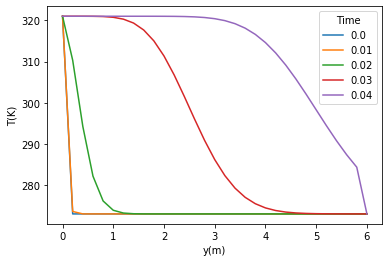

In [5]:
def rho(T):         #openterrace            
    """
    T(float): temperature in kelvin 

    Returns the density of water at a given temperature.
    """

    return -0.00365471*(T**2) + 1.93017*T + 746.025



def k(T):           #openterrace

  """
    T(float): temperature in kelvin

    Returns the thermal conductivity of water at a given temperature.
  """
  return -9.29827e-6*(T**2) + 0.0071857*T - 0.710696


def cp(T):          #openterrace

    """
    T(float): temperature in kelvin

    Returns the specific heat of water at a given temperature.
    """
    return -0.000127063*(T**3) + 0.13736*(T**2) - 48.6714*T + 9850.69

    
import numpy as np
import matplotlib.pyplot as plt

class tank:
    def __init__(self,r,h):     # constructor
        self.r=r            # radius
        self.h=h           # height
    def area_base(self):        # area of base
        return self.r*self.r*3.14
    def total_surface_area(self,h):         # total surface area of cylinder
        return 2*3.14*self.r*(h + self.r)
    def surface_area(self,h): # surface area of cylinder
        return 2*3.14*self.r*h

tank_=tank(0.5,6)   #unit: m
#print(cylinder_.area_base())


y_max=tank_.h  
dy=0.2
t_max=100  #unit: s
#cp=4184  #specific heat capacity of water   # unit: J/kg/K
#rho=997   # unit: kg/m^3
dt=0.01     #unit: s
#k=0.6 # thermal conductivity of water       # unit: W/m/K
T0=273
v=0.1
def FTCS(t_max,y_max,dt,T0,v):
    
    """
    https://en.wikipedia.org/wiki/FTCS_scheme#:~:text=In%20numerical%20analysis%2C%20the%20FTCS,similar%20parabolic%20partial%20differential%20equations.&text=The%20abbreviation%20FTCS%20was%20first%20used%20by%20Patrick%20Roache

    https://en.wikipedia.org/wiki/Numerical_solution_of_the_convection%E2%80%93diffusion_equation#Solving_the_convection%E2%80%93diffusion_equation_using_the_finite_difference_method

    http://people.eecs.berkeley.edu/~demmel/cs267/lecture17/lecture17.html#:~:text=Discretizing%20the%202D%20Heat%20Equation,-We%20will%20look&text=u(i%2Cj%2Cm,(j)%3Dj*h.

    https://www.engineeringtoolbox.com/water-density-specific-weight-d_595.html

    http://tiac.ca/wp-content/uploads/2015/12/TIAC_Guide_English_2013-Section-02.pdf

    https://en.wikipedia.org/wiki/Hot_water_storage_tank

    Solves the heat equation using the Finite Time Central Scheme.
    
    t_max(float): maximum time in seconds
    y_max(float): maximum height in meters
    dt(float): the time step.
    T0(float): the initial temperature.
    phi(float): porosity 
    v(float): velocity

    """
    
    t_array=np.arange(0,t_max+dt,dt) # time array
    y_array=np.arange(0,y_max+dy,dy) # space array
    T=np.zeros((len(t_array),len(y_array)))
    T[:,-1]=273	#boundary condition
    T[0,:]=T0 # initial condition
    
    T[:,0]=321	# boundary condition
    
     # velocity      # unit: m/s
    #phi=0.005 # porosity      #taken randomly    # dimensionless
    U=0.065 #calcum silicate

    A=2*tank_.r*(dy)
    Tamb=300
    """
    https://en.wikipedia.org/wiki/Superficial_velocity

    """
    #u0=v*phi  #superficial velocity

    for i in range(1,len(t_array)):
        for j in range(1,len(y_array)-1):
            alpha=k(T[i-1,j])/(rho(T[i-1,j])*cp(T[i-1,j]))
            r=alpha*dt/dy**2   # stability condition
            #x=(dy*v)/alpha            
            if(r<0.5):  # stability condition
                T[i,j]=T[i-1,j] + ((r*(T[i-1,j-1]-2*T[i-1,j]+T[i-1,j+1]))) - \
                    v*((T[i-1,j]-T[i-1,j-1])/(2*dy))*dt+\
                        U*A*(Tamb-T[i-1,j])/(rho(T[i-1,j])*cp(T[i-1,j]))  #heat_loss
                        

            else:
                raise ValueError('Stability condition not satisfied for this time step and space step combination')
            
      
            
    return T,t_array,y_array

T,t_array,y_array=FTCS(t_max,y_max,dt,T0,v)
plt.plot(y_array,T[int(0.0035/dt),:])
plt.plot(y_array,T[int(0.05/dt),:])
plt.plot(y_array,T[int(6/dt),:])
plt.plot(y_array,T[int(50/dt),:])
plt.plot(y_array,T[int(100/dt),:])
plt.xlabel("y(m)")
plt.ylabel("T(K)")
plt.legend(t_array,loc='upper right',fontsize=10,title='Time')
#plt.figure()
plt.show()

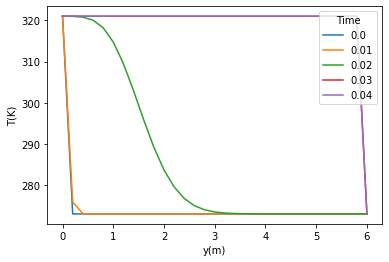

In [19]:
v=0.5
T,t_array,y_array=FTCS(t_max,y_max,dt,T0,v)
plt.plot(y_array,T[int(0.0035/dt),:])
plt.plot(y_array,T[int(0.05/dt),:])
plt.plot(y_array,T[int(6/dt),:])
plt.plot(y_array,T[int(50/dt),:])
plt.plot(y_array,T[int(100/dt),:])
plt.xlabel("y(m)")
plt.ylabel("T(K)")
plt.legend(t_array,loc='upper right',fontsize=10,title='Time')
#plt.figure()
plt.show()
